<a href="https://colab.research.google.com/github/lee-euijin/AppleFarm/blob/main/Master/Hand_Gesture_Recognition_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Gesture Recognition with Deep Learning**

##Team : 꿈꾸는AI




## **1. Vision of Gesture Recognition**








*   Connectivity : 디바이스와 인간의 자연스러운 상호작용
*   Natural, Intuitive Sensing Process : 유기적 연결의 가장 기본이 된다.
*   Gesture is the most intutive sensing process

    * Mobile Environment : Ios Gesture Action, Android Good Lock
    * VR AR Environment : Class VR - VR AR Based Education, Facebook / Nvidia - MetaVerse, VR / AR Gaming
    * Communicate with your stuff, even.. your home : BMW Gesture Control, Clay VR - Smart Home


><img src = "https://drive.google.com/uc?id=1-18KEIw3w9iXCaDyr5xbuxqUZ6_vpxQU" width = "300">
><img src = "https://drive.google.com/uc?id=1-XBDJiQkEqVWUkXtDUzgkq_CCNSvQ2fd" width = "300">
><img src = "https://drive.google.com/uc?id=1-RxTXUgBTWX83akt5iKfFuLA45qM3FMW" width = "300">
><img src = "https://drive.google.com/uc?id=1-WhW3zBLoe4VHXAVJQ480xR6GVaHRCd7" width = "300">
><img src = "https://drive.google.com/uc?id=1-OHS_hYQ6B0N723A0XLBd0jWS0_wcoQR" width = "300">
><img src = "https://drive.google.com/uc?id=1-X0KZTy8fAXG_HDK8zlqkLVHvErlfR-c" width = "300">


## **2. What We made?**




* Gesture Recognition 의 시작은 대상이 취한 Gesture를 인식하고 분류하는 Module인 **Gesture Classifier**를 만드는 것에서 시작한다.

* 우리는 대상의 손동작 Gesture를 Sensing 하여 아래의 총 10개의 동작으로 구분하는 문제를 해결한다.

    1. Palm
    2. l
    3. fist
    4. fist_moved
    5. thumb
    6. index
    7. ok
    8. palm_moved
    9. c
    10. down

><img src = "https://drive.google.com/uc?id=1BLLcwa7MkqCvnY7YvaoTn2P5MeDrNnEJ" width = "500">



## **3. Model Structure**

><img src = "https://drive.google.com/uc?id=1pNAGpM4ywKCGpk3s8eceXwBAtgcuNWfV" width = "500">


------------------
(1) Data set

* Data Set의 종류에는 Kaggle에서 불러온 데이터, 우리가 직접 만든 데이터, 직접 만든 데이터를 Augmentation 처리한 총 **3가지 종류**의 Data Set을 마련

* **Converting Module**은 JavaScript를 이용해 **WebCam을 Colab 환경에 불러오고**, 이를 일정 시간 간격으로 **Periodic Sampling을 수행**한다.

* 이 모듈을 이용해 Self-Made Data Set을 구성한다. 이 셋은 이미지 형태이다.
------------------
(2) Input

* **실제로 우리가 Gesture를 Classifing 할 데이터** 입력을 의미한다.
* 이 역시 위에서 언급된 **Converting Module을 이용해 Image Data로 변환**한다.
------------------
(3) PreProcessing Model
* Image Data를 모델의 **입력으로 넣을 수 있는 형태로 가공**해주는 모듈이다.
* Image Data를 **128 * 128 Size의 Gray Scale Skeleton Image**로 변환한다.
------------------
(4) CNN Model
* Preprocessing 을 완료한 Skeleton Data를 CNN Model에 입력한다.
* Kaggle Data의 경우 **성능이 낮아 유의미한 튜닝이 불가능**했다.
* Self_Made_Model은 나름 **성능이 좋게 나와 모델 튜닝에 사용**했다.
* Self_Made_Model에 대하여 **4가지 Trial을 진행**했다.
* 최종적으로 나온 **가장 고성능의 모델에 대하여 Augmented Data에 대한 학습을 진행**했다.
------------------
(5) Classified Result
* 1 - 10 중 하나의 결과물을 출력한다.
* **Training Data**에 대해서는 이 결과를 이용해 **학습**을 진행한다.
* **Validation Data와 Test Data**에 대해서는 결과를 이용해 **Model Evaluation**을 진행한다.
* **Input Data**를 넣었을 때 1 - 10 의 **Label에 해당하는 값을 화면에 출력**한다.

------------------

## **4. Design Converting Module which converts WebCam Camera Input data into Image data using periodic sampling method + Box labelling**
**(+Preprocess Module Embedded)**

### Colab에 Video Stream 생성

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow import keras

In [ ]:
# opencv-tool 설치
! pip install mediapipe opencv-python

     |████████████████████████████████| 32.4 MB 64 kB/s 


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import PIL
import io
import html
import time
import mediapipe as mp # Face, Body, Hand Pose Detection 라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [ ]:
# 저장한 모델 불러오기
model = tf.keras.models.load_model('/content/drive/MyDrive/model_new/model_made_augmentation.h5')

In [ ]:
# js image 를  opencv 이미지 바꿔주기
def js_to_image(js_reply):
  """
  asassasasasa
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)  # 바이너리 파일 읽어옴
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# OpenCV Rectangle bounding box image 를 base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) { // 꺼진게 아니면 
        window.requestAnimationFrame(onAnimationFrame);  //  함수는 기본적으로는 1초에 60번, 보통은 모니터에 주사율에 맞추어 함수를 실행함.
      }
      if (pendingResolve) { // 보류중
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480); // 이미지를 그려
          result = captureCanvas.toDataURL('image/jpeg', 0.8)  // 캔버스에 그린 그림을 문자열 형태로.  0.8 = encoderOptions

        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});  //모바일 장치의 후면 카메라를 요청하기 위한 코드:
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox)) # 자바스크립트 함수 사용하기 
  
  return data

### Preprocessing and Saving Module

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count =1
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])    
    
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

      # Recolor Feed
      image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Make Detections
      results = holistic.process(image)
     
      # Recolor image back to BGR for rendering
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
      
      # landmark만 그릴 image
      landmark_img = np.zeros(image.shape, np.uint8)
      
      # Right hand
      mp_drawing.draw_landmarks(landmark_img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

      #웹캠에서 얻은 data를 train data로 추가 저장
      save_path = '/content/drive/My Drive/13/01_palm/'

      if np.max(landmark_img) !=0:
       cv2.imwrite(save_path + 'frame_13_10_{:04d}.png'.format(count), landmark_img) # 저장할 데이터 form
       count += 1

## **5. Preprocess Data (Image -> Skeleton) By MediaPipe (Preprocess Kaggle Data)**

**Process**

1. Data Upload

  (1) Mount Google Drive

  (2) Copy and Unzip the Kaggle Data in the local directory
   
    - ( 뒷 단계에서 Self_Made_data 와 Augmented Data도 업로드 및 Preprocess 진행 )

  (3) Set Directory Path

2. Data Preprocessing and saving
   
  (1) Kaggle Data를 MediaPipe를 이용, Object Ditection과 이를 바탕으로 Skeleton Data를 얻는다.

  (2) 얻은 데이터를 지정해놓은 디렉토리 경로 내에 저장한다.

  (3) 제대로 Preprocessing이 되었는지 확인하기 위해 Image Plotting 을 수행한다.

### Data upload

* mount drive, copy and unzip the kaggle data in the local directory

In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

# unzip
import zipfile, shutil

dataset = '/content/gdrive/My Drive/학교 수업 자료/딥러닝/Project/static_data.zip'
dst_path = '/content/static_data'
dst_file = os.path.join(dst_path, 'static_data.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Mounted at /content/gdrive


* 이미지의 경로를 imagepaths list에 저장

In [ ]:
import os
imagepaths = []

for dirname, _, filenames in os.walk('/content/static_data'):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    if path.endswith("png"):
      imagepaths.append(path)

print(len(imagepaths))
print(imagepaths[19999]) # index 20000부터는 path만 다르고, 똑같은 data가 반복됨

40000
/content/static_data/leapGestRecog/08/09_c/frame_08_09_0200.png


* kaggle의 데이터를 skeleton으로 변형할 구글 드라이브 내의 directory 생성

In [ ]:
# google drive에 directory 추가
dir_path = '/content/gdrive/My Drive/학교 수업 자료/딥러닝/Project/static_skeleton_data'

for path in imagepaths[:19999]:
  splitted = path.split("/")

  # 없으면 directory 추가
  dir = os.path.join(dir_path, splitted[4])

  if not os.path.exists(dir):
    os.makedirs(dir)

  dir = os.path.join(dir_path, splitted[4], splitted[5])

  if not os.path.exists(dir):
    os.makedirs(dir)

### Data Preprocessing and Saving

In [ ]:
!pip install mediapipe opencv-python

     |████████████████████████████████| 37.7MB 1.5MB/s 


* kaggle 데이터를 skeleton data로 바꾸어 미리 생성해둔 directory 내에 저장

In [ ]:
# 최초 save 이후에는 이 셀 실행하지 않음!
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import mediapipe as mp
from google.colab.patches import cv2_imshow

new_path = []

# 저장을 위한 path 생성
for path in imagepaths[:19999]:
  splitted = path.split("/")
  temp = '/' + splitted[4] + '/' + splitted[5] + '/' + splitted[6]
  new_path.append(temp)

# train data preprocessing and save
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

new_paths = []

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx in range(19999):
    # image read
    image = cv.imread(imagepaths[idx])
    # bgr에서 rgb로 convert
    results = hands.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

    # draw hand landmarks
    # print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()

    # landmark만 그릴 image
    landmark_image = np.zeros(image.shape)
    for hand_landmarks in results.multi_hand_landmarks:
      '''print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height}'
      )'''
      mp_drawing.draw_landmarks(
          landmark_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    '''# imshow
    cv2_imshow(annotated_image)
    cv2_imshow(landmark_image)'''
    
    # save
    if len(new_paths) % 1000 == 0 or len(new_paths) == 19999:
      print(len(new_paths))
    cv.imwrite(dir_path + new_path[idx], landmark_image)
    new_paths.append(os.path.join(dir_path, new_path[idx]))

# 19999개 중 6765개는 skeleton이 생성되지 않았기 때문에 지워짐
print(len(new_paths))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
13235


* image plot

/content/gdrive/MyDrive/학교 수업 자료/딥러닝/Project/static_skeleton_data/05/07_ok/frame_05_07_0010.png


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_

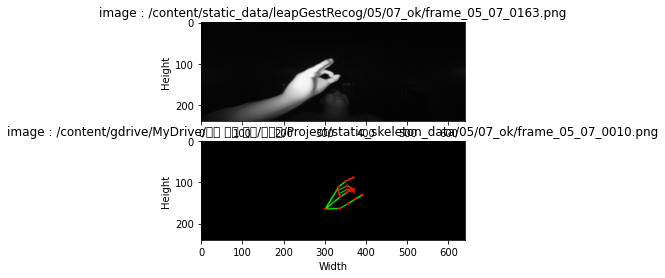

In [ ]:
import cv2

print(new_paths[0])
def img_plot(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ('Shape : ', img.shape)

  plt.grid(False)
  plt.imshow(img)
  plt.xlabel('Width')
  plt.ylabel('Height')
  plt.title('image : ' + img_path)

plt.subplot(211)
img_plot(imagepaths[0]) # 전처리 전 kaggle data

plt.subplot(212)
img_plot(new_paths[0]) # 전처리 후 kaggle data

## **6. Design CNN Model which classifies what the gesture is, Evaluate and Tune Model** 
**(+Preprocess Self_made_data and Augmented Data)**

**Process**
1. Training and Evaluating it
2. Testing 
  * **Training / Validation**은 **같은 데이터 셋 (12, 13, 14 : 사람)** 내에서 Split 
  * **Test Data**는 Self_Made지만 **다른 환경(10)에서 Labeling한** Data를 이용 
  * 따라서 **Validataion Accuracy와 Test Accuracy의 차이가 크다.**
  * 우리는 **다양한 환경에서 Gesture를 인식하는 것**이므로 위와 같은 특수한 방법으로 Test를 진행했다.
  * Training / Validation 역시 **다양한 환경에서 labeling 하는 것이 더 좋으나, 시간적 제약이 있어** 위와 같은 해결방식으로 대체하였다.
 
3. Self_Made Dataset과 Augmented Data에 대해 Preprocessing 과 1, 2 적용



 (Self_Made Dataset은 Converting Module을 통해 각 팀원이 생성한 Data를 Load하여 진행 )

---------------------
**Evaluating and Tuning Process**

1. Kaggle Data Set의 경우 앞에서 살펴봤던 바와 같이, **웹캠 구도가 아닌 구도로 찍힌 데이터들이 많아 모델의 성능이 좋지 않았다** 

 (실제로 성능이 좋지 않아, Self_made Data에서 Tunning 한 최종결과를 다시 적용하였는데도 결과는 아래와 같이 나왔다.)

   (Test Accuracy : **23.17%**)

2. 그래서 우리는 직접 제작한 **Self_Made 데이터를 이용**해서 다시 모델을 구성하였다.

3. 1st Trial Model을 적용하였다.
<img src = "https://drive.google.com/uc?id=1UtoVfZqgqforwWUMJmzvS0m8mDcTDuTe" width = "500">


   * (Test Accuracy : **41.5850%**)

4. Model이 **너무 Shallow하여** 성능이 낮게 나온 것으로 보여 Model을 좀 더 **Deep하게 구성**하였다.

5. 2nd Trial Model을 적용하였다.
<img src = "https://drive.google.com/uc?id=14a5ePgi1qbWgw2Gdt5Iq7mQiKhx8mVmS" width = "500">


   * (Test Accuracy : **74.7763%**)

6. Validation Accuracy가 더 이상 증가하지 않고 진동하며 실제 Test Accuracy와 차이가 커, **OverFitting이 발생**하였다고 판단, **Regulation을 위해 DropOut**을 넣어줬다.

7. 3rd Trial Model을 적용하였다,
<img src = "https://drive.google.com/uc?id=1fD_3ft3UXbtSuhOnxS9ufJA9U139gOnE" width = "500">


   * (Test Accuracy : **80.5709%**)

8. 성능을 더 향상 시키기 위해 **Early Stop CallBack을 적용**하여 Accuracy가 증가하지 않을 경우 Training을 종료하여 **Overfitting을 방지**하였다.

9. 4rd Trial (Final Tunning)
<img src = "https://drive.google.com/uc?id=1y60PVm79lHPM7eH-B5f5MEc01oQym-Vw" width = "500">


   * (Test Accuracy : **80.9118%**)

10. **DataSet에 Augmentation을 적용**하여 성능을 비약적으로 향상시켰다.

  (Test Accuracy: **88.7942%**)

### **Kaggle Data**

### Kaggle Data Training

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

In [ ]:
# Creating training set and labels
X = []
y = []

print(new_paths[0])
for path in new_paths[:]:
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (128,128))
  X.append(img)

  # image 경로에서 label 추출
  category = path.split('/')[9] # 9번째가 label! (07_ok)
  label = int(category.split('_')[0][1])
  y.append(label)

# X, y를 numpy array로 바꿈
X = np.array(X)
X = X.reshape(len(new_paths[:]), 128, 128, 1)
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], new_paths[0])

/content/gdrive/MyDrive/학교 수업 자료/딥러닝/Project/static_skeleton_data/05/07_ok/frame_05_07_0010.png
Images loaded:  13235
Labels loaded:  13235
7 /content/gdrive/MyDrive/학교 수업 자료/딥러닝/Project/static_skeleton_data/05/07_ok/frame_05_07_0010.png


In [ ]:
# Test train split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(X_train, y_train, epochs=15, batch_size=64, verbose=2, validation_data=(X_val, y_val))

Epoch 1/15
166/166 - 300s - loss: 0.1839 - accuracy: 0.9444 - val_loss: 0.1953 - val_accuracy: 0.9350
Epoch 2/15
166/166 - 299s - loss: 0.0953 - accuracy: 0.9717 - val_loss: 0.1389 - val_accuracy: 0.9637
Epoch 3/15
166/166 - 299s - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0801 - val_accuracy: 0.9751
Epoch 4/15
166/166 - 300s - loss: 0.0432 - accuracy: 0.9853 - val_loss: 0.0639 - val_accuracy: 0.9815
Epoch 5/15
166/166 - 299s - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.1292 - val_accuracy: 0.9675
Epoch 6/15
166/166 - 299s - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0777 - val_accuracy: 0.9792
Epoch 7/15
166/166 - 299s - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0907 - val_accuracy: 0.9792
Epoch 8/15
166/166 - 299s - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0905 - val_accuracy: 0.9754
Epoch 9/15
166/166 - 298s - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0857 - val_accuracy: 0.9781
Epoch 10/15
166/166 - 298s - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.1221 - 

* result

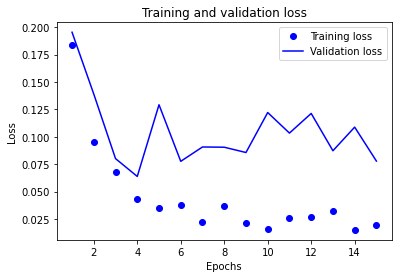

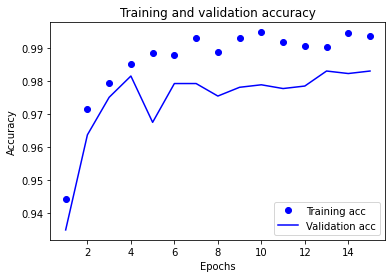

In [ ]:
# plotting
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# save
model.save('/content/gdrive/MyDrive/trained_kaggle/trained_kaggledata.h5')

### Kaggle Data Testing

* 직접 만든 데이터로 test 진행

In [ ]:
# test data
X_test = []
y_test = []

test_paths = []

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/10'):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    if path.endswith("png"):
      test_paths.append(path)

print(len(test_paths))
print(test_paths[len(test_paths)-1])

for path in test_paths[:]:
  # image data
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (128,128))
  X_test.append(img)
  if len(X_test) % 100 == 0 or len(X_test) == len(test_paths):
    print('number of X test data : ', len(X_test))

  # labels
  category = path.split('/')[5]
  label = int(category.split('_')[0][1])
  y_test.append(label)

X_test = np.array(X_test)
X_test = X_test.reshape(len(test_paths), 128, 128, 1)
y_test = np.array(y_test)

print('test 이미지 개수 : ', len(X_test))
print('test 라벨 개수 : ', len(y_test))
print(y_test[0], test_paths[0])

2347
/content/gdrive/MyDrive/10/09_c/frame_00_09_0290.png
number of X test data :  100
number of X test data :  200
number of X test data :  300
number of X test data :  400
number of X test data :  500
number of X test data :  600
number of X test data :  700
number of X test data :  800
number of X test data :  900
number of X test data :  1000
number of X test data :  1100
number of X test data :  1200
number of X test data :  1300
number of X test data :  1400
number of X test data :  1500
number of X test data :  1600
number of X test data :  1700
number of X test data :  1800
number of X test data :  1900
number of X test data :  2000
number of X test data :  2100
number of X test data :  2200
number of X test data :  2300
number of X test data :  2347
test 이미지 개수 :  2347
test 라벨 개수 :  2347
1 /content/gdrive/MyDrive/10/01_palm/frame_00_01_0002.png


In [ ]:
# loss and accuracy on test 

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

74/74 [==============================] - 16s 221ms/step - loss: 13.8318 - accuracy: 0.2318
Test accuracy : 23.1785%


### **Self_Made Data**




### Data upload

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

* mount drive

In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


* 이미지의 경로를 skeletonpaths list에 저장

In [ ]:
dir_path = '/content/gdrive/MyDrive/static_skeleton_data'
skeletonpaths = []

for dirname, _, filenames in os.walk(dir_path):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    
    if path.endswith("png"):
      skeletonpaths.append(path)

print(len(skeletonpaths))
print(skeletonpaths[0])

7838
/content/gdrive/MyDrive/static_skeleton_data/12/01_palm/frame_00_12_0001.png


### Training

* X, y 변수 생성

In [ ]:
# Creating trainig set and labels
X_made = []
y_made = []

for path in skeletonpaths[:len(skeletonpaths)]:
  # image data
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (128, 128))
  X_made.append(img)
  if len(X_made) % 100 == 0 or len(X_made) == len(skeletonpaths):
    print(len(X_made))

  # labels
  category = path.split("/")[6] # path에서 6번째가 label
  label = int(category.split("_")[0][1])
  y_made.append(label)

X_made = np.array(X_made)
X_made = X_made.reshape(len(skeletonpaths), 128, 128, 1)
y_made = np.array(y_made)

print("이미지 개수 : ", len(X_made))
print("라벨 개수 : ", len(y_made))
print(y_made[0], skeletonpaths[0])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7838
이미지 개수 :  7838
라벨 개수 :  7838
1 /content/gdrive/MyDrive/static_skeleton_data/12/01_palm/frame_00_12_0001.png


* 생성한 변수 (X, y) 저장

In [ ]:
# data 저장
np.save('/content/gdrive/MyDrive/made/input_data_made.npy', X_made)
np.save('/content/gdrive/MyDrive/made/label_data_made.npy', y_made)

# 저장 잘 됐는지 확인
X_made_ = np.load('/content/gdrive/MyDrive/made/input_data_made.npy')

print(np.array_equal(X_made, X_made_)) # array가 같은지 확인

True


In [ ]:
# 저장한 image data 불러오기
X_made = []
y_made = []
X_made = np.load('/content/gdrive/MyDrive/made/input_data_made.npy')
y_made = np.load('/content/gdrive/MyDrive/made/label_data_made.npy')

print(len(X_made))
print(len(y_made))

print(X_made.shape)

7838
7838
(7838, 128, 128, 1)


### Training (1st try) : test_acc = 41.5850%

In [ ]:
# test train split
X_train_made, X_val_made, y_train_made, y_val_made = train_test_split(X_made, 
                                                                      y_made, 
                                                                      test_size = 0.2, 
                                                                      random_state=10)

In [ ]:
# model
model_made = Sequential()
model_made.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(64, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Flatten())
model_made.add(Dense(128, activation='relu'))
model_made.add(Dense(10, activation='softmax'))

model_made.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model_made.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_made = model_made.fit(X_train_made, y_train_made, epochs=10, batch_size=64,
                              verbose=2, validation_data=(X_val_made, y_val_made))

Epoch 1/10
98/98 - 4s - loss: 2.5224 - accuracy: 0.6100 - val_loss: 0.6523 - val_accuracy: 0.8061
Epoch 2/10
98/98 - 2s - loss: 0.2249 - accuracy: 0.9330 - val_loss: 0.4984 - val_accuracy: 0.8705
Epoch 3/10
98/98 - 2s - loss: 0.0381 - accuracy: 0.9893 - val_loss: 0.5972 - val_accuracy: 0.8890
Epoch 4/10
98/98 - 2s - loss: 0.0210 - accuracy: 0.9946 - val_loss: 0.8514 - val_accuracy: 0.8744
Epoch 5/10
98/98 - 2s - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.8238 - val_accuracy: 0.8986
Epoch 6/10
98/98 - 2s - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.9204 - val_accuracy: 0.8954
Epoch 7/10
98/98 - 2s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.9916 - val_accuracy: 0.8858
Epoch 8/10
98/98 - 2s - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.9833 - val_accuracy: 0.8980
Epoch 9/10
98/98 - 2s - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.8968 - val_accuracy: 0.8960
Epoch 10/10
98/98 - 2s - loss: 3.7869e-04 - accuracy: 0.9997 - val_loss: 0.9616 - val_accuracy: 0.8954


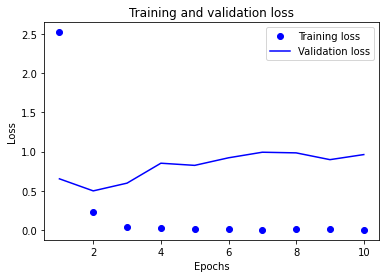

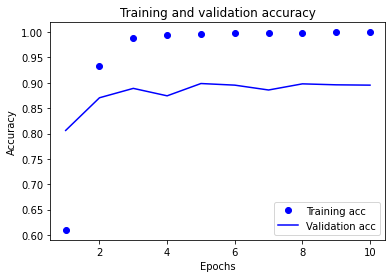

In [ ]:
# plotting
loss = history_made.history['loss']
val_loss = history_made.history['val_loss']
acc = history_made.history['accuracy']
val_acc = history_made.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* 직접 만든 데이터로 test 진행

In [ ]:
# test data
X_test = []
y_test = []

test_paths = []

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/10'):
  for filename in filenames:
    path = os.path.join(dirname, filename)
    if path.endswith("png"):
      test_paths.append(path)

#print(len(test_paths))
#print(test_paths[len(test_paths)-1])

for path in test_paths[:]:
  # image data
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (128,128))
  X_test.append(img)
  if len(X_test) % 100 == 0 or len(X_test) == len(test_paths):
    print(len(X_test))

  # labels
  category = path.split('/')[5]
  label = int(category.split('_')[0][1])
  y_test.append(label)

X_test = np.array(X_test)
X_test = X_test.reshape(len(test_paths), 128, 128, 1)
y_test = np.array(y_test)

print('test 이미지 개수 : ', len(X_test))
print('test 라벨 개수 : ', len(y_test))
print(y_test[0], test_paths[0])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2347
test 이미지 개수 :  2347
test 라벨 개수 :  2347
1 /content/gdrive/MyDrive/10/01_palm/frame_00_01_0002.png


In [ ]:
# loss and accuracy on test 

test_loss, test_acc = model_made.evaluate(X_test, y_test)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

74/74 [==============================] - 0s 6ms/step - loss: 6.9861 - accuracy: 0.4159
Test accuracy : 41.5850%


### confusion matrix

In [ ]:
pred2 = model_made.predict_generator(X_test)
y_pred2 = np.argmax(pred2, axis=-1) # 모델이 예측한 class label

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Text(0.5, 185.99374999999995, 'Predicted')

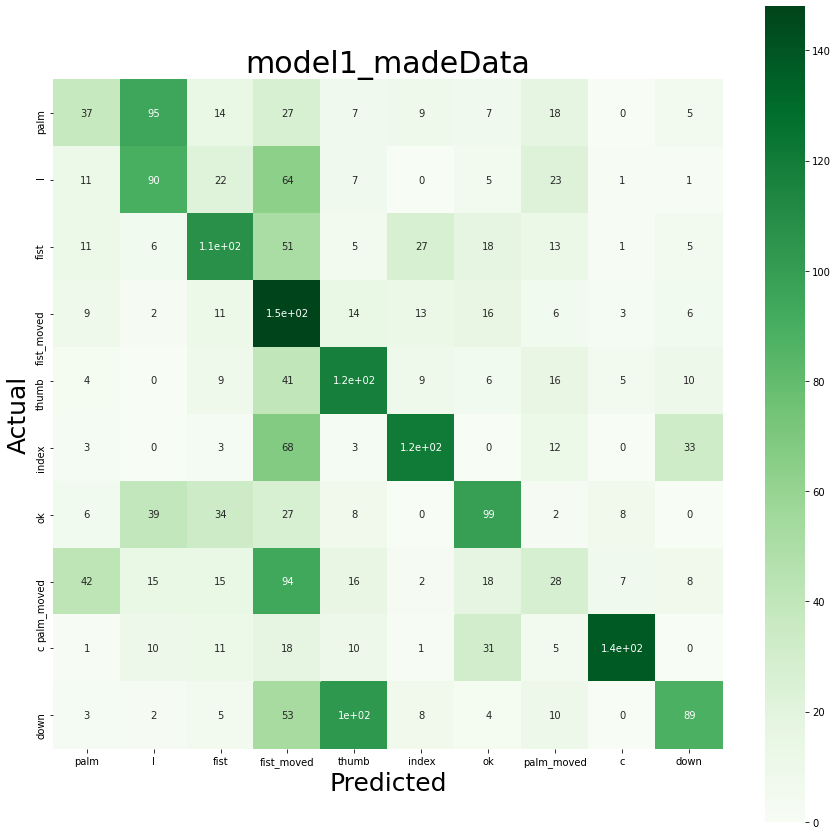

In [ ]:
labels = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']

plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_title("model1_madeData", fontsize=30)
ax.set_ylabel('Actual', fontsize=25)
ax.set_xlabel('Predicted', fontsize=25)

### Training (2nd try) : test_acc = 74.7763%

* with a more Conv2D (128 filters)

In [ ]:
# model
model_made = Sequential()
model_made.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(64, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Flatten())
model_made.add(Dense(128, activation='relu'))
model_made.add(Dense(10, activation='softmax'))

model_made.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
model_made.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_made = model_made.fit(X_train_made, y_train_made, epochs=30, batch_size=64,
                              verbose=2, validation_data=(X_val_made, y_val_made))

Epoch 1/30
98/98 - 47s - loss: 1.7350 - accuracy: 0.4810 - val_loss: 0.6188 - val_accuracy: 0.8023
Epoch 2/30
98/98 - 3s - loss: 0.3366 - accuracy: 0.8904 - val_loss: 0.2159 - val_accuracy: 0.9324
Epoch 3/30
98/98 - 3s - loss: 0.1039 - accuracy: 0.9671 - val_loss: 0.1548 - val_accuracy: 0.9592
Epoch 4/30
98/98 - 3s - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.1276 - val_accuracy: 0.9681
Epoch 5/30
98/98 - 3s - loss: 0.0433 - accuracy: 0.9856 - val_loss: 0.1629 - val_accuracy: 0.9598
Epoch 6/30
98/98 - 3s - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.1127 - val_accuracy: 0.9681
Epoch 7/30
98/98 - 3s - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.1617 - val_accuracy: 0.9700
Epoch 8/30
98/98 - 3s - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.1649 - val_accuracy: 0.9624
Epoch 9/30
98/98 - 3s - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.1012 - val_accuracy: 0.9802
Epoch 10/30
98/98 - 3s - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.1093 - val_accuracy: 0.9770
Epoch 11/30
98/98 

* result

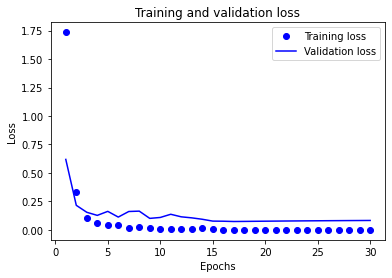

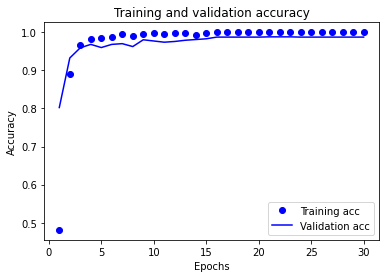

In [ ]:
# plotting
loss = history_made.history['loss']
val_loss = history_made.history['val_loss']
acc = history_made.history['accuracy']
val_acc = history_made.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# loss and accuracy on test 

test_loss, test_acc = model_made.evaluate(X_test, y_test)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

74/74 [==============================] - 1s 8ms/step - loss: 1.8044 - accuracy: 0.7478
Test accuracy : 74.7763%


### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
pred1 = model_made.predict_generator(X_test)
y_pred1 = np.argmax(pred1, axis=-1) # 모델이 예측한 class label

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Text(0.5, 185.99374999999995, 'Predicted')

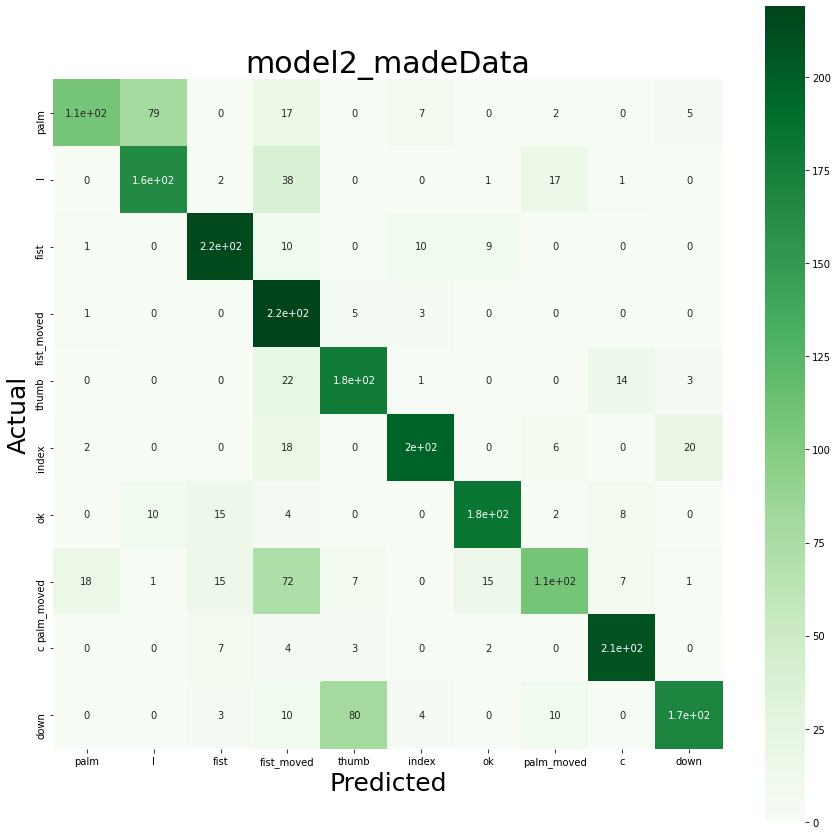

In [ ]:
labels = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']

plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_title("model2_madeData", fontsize=30)
ax.set_ylabel('Actual', fontsize=25)
ax.set_xlabel('Predicted', fontsize=25)

### Training (3rd try) : test_acc = 80.5709%

* with dropout

In [ ]:
# model
model_made = Sequential()
model_made.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(64, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Flatten())
model_made.add(Dropout(0.3)) # dropout
model_made.add(Dense(128, activation='relu'))
model_made.add(Dense(10, activation='softmax'))

model_made.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)      

In [ ]:
model_made.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_made = model_made.fit(X_train_made, y_train_made, epochs=30, batch_size=64,
                              verbose=2, validation_data=(X_val_made, y_val_made))

Epoch 1/30
98/98 - 4s - loss: 1.4296 - accuracy: 0.5424 - val_loss: 0.4007 - val_accuracy: 0.8763
Epoch 2/30
98/98 - 3s - loss: 0.2985 - accuracy: 0.9067 - val_loss: 0.1977 - val_accuracy: 0.9432
Epoch 3/30
98/98 - 3s - loss: 0.1364 - accuracy: 0.9542 - val_loss: 0.1074 - val_accuracy: 0.9713
Epoch 4/30
98/98 - 3s - loss: 0.0742 - accuracy: 0.9753 - val_loss: 0.0930 - val_accuracy: 0.9732
Epoch 5/30
98/98 - 3s - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0856 - val_accuracy: 0.9770
Epoch 6/30
98/98 - 3s - loss: 0.0414 - accuracy: 0.9858 - val_loss: 0.0885 - val_accuracy: 0.9739
Epoch 7/30
98/98 - 3s - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0719 - val_accuracy: 0.9828
Epoch 8/30
98/98 - 3s - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.1191 - val_accuracy: 0.9777
Epoch 9/30
98/98 - 3s - loss: 0.0233 - accuracy: 0.9919 - val_loss: 0.1044 - val_accuracy: 0.9790
Epoch 10/30
98/98 - 3s - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.1052 - val_accuracy: 0.9783
Epoch 11/30
98/98 -

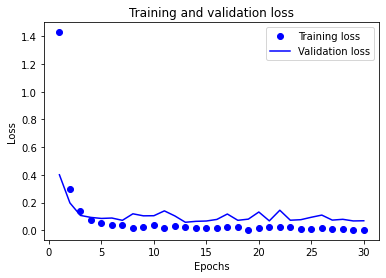

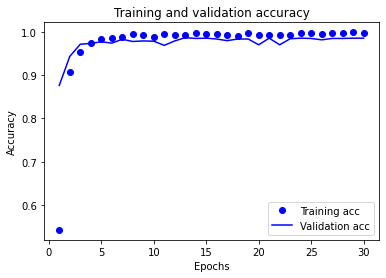

In [ ]:
# plotting
loss = history_made.history['loss']
val_loss = history_made.history['val_loss']
acc = history_made.history['accuracy']
val_acc = history_made.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# loss and accuracy on test 

test_loss, test_acc = model_made.evaluate(X_test, y_test)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

74/74 [==============================] - 0s 6ms/step - loss: 1.1577 - accuracy: 0.8057
Test accuracy : 80.5709%


### confusion matrix

In [ ]:
pred3 = model_made.predict_generator(X_test)
y_pred3 = np.argmax(pred3, axis=-1) # 모델이 예측한 class label

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Text(0.5, 185.99374999999995, 'Predicted')

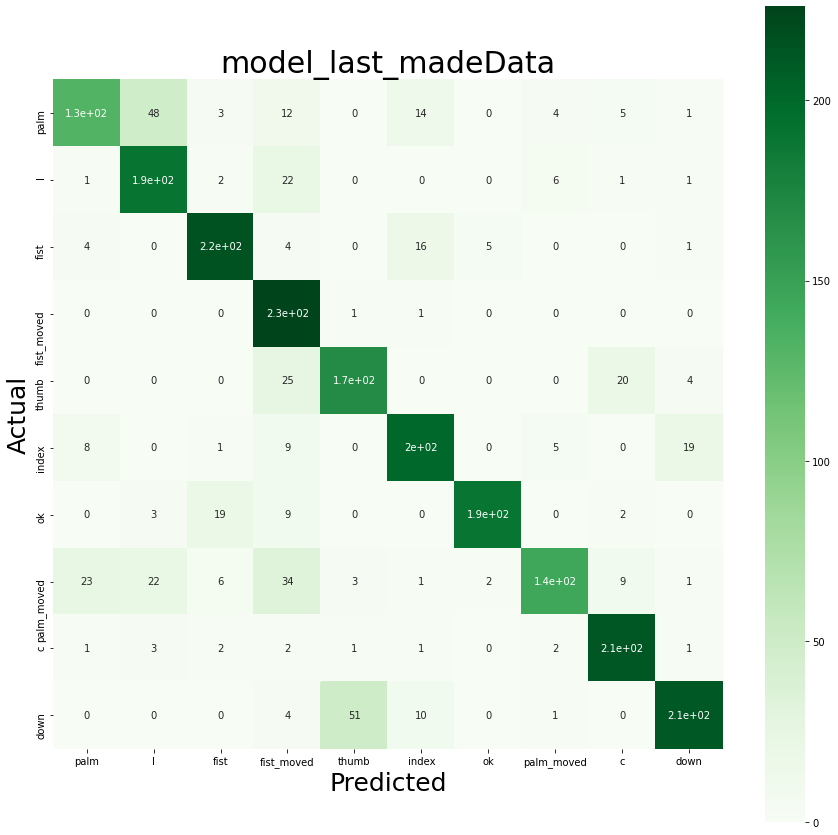

In [ ]:
labels = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']

plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_title("model_last_madeData", fontsize=30)
ax.set_ylabel('Actual', fontsize=25)
ax.set_xlabel('Predicted', fontsize=25)

### Training (4th try) : test_acc = 80.9118%

* with callback and more epochs

In [ ]:
# model
model_made = Sequential()
model_made.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(64, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Conv2D(128, (3,3), activation='relu'))
model_made.add(MaxPooling2D((2,2)))
model_made.add(Flatten())
model_made.add(Dropout(0.3)) # dropout
model_made.add(Dense(128, activation='relu'))
model_made.add(Dense(10, activation='softmax'))

model_made.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 128)      

In [ ]:
from tensorflow.keras import callbacks

callbacks_list = [callbacks.EarlyStopping(monitor='accuracy', 
                                          patience=7) # 다음에폭에서 증가되지 않으면 멈추겠다. 
            ] 


model_made.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_made = model_made.fit(X_train_made, y_train_made,
          epochs=100,
          batch_size=64,
          callbacks=callbacks_list, # 이렇게 callback list 를 넘겨줄수 있다.
          verbose=2, 
          validation_data=(X_val_made, y_val_made))


Epoch 1/100
98/98 - 4s - loss: 1.5679 - accuracy: 0.5053 - val_loss: 0.5471 - val_accuracy: 0.8246
Epoch 2/100
98/98 - 3s - loss: 0.3737 - accuracy: 0.8743 - val_loss: 0.2507 - val_accuracy: 0.9273
Epoch 3/100
98/98 - 3s - loss: 0.1497 - accuracy: 0.9525 - val_loss: 0.1140 - val_accuracy: 0.9700
Epoch 4/100
98/98 - 3s - loss: 0.0923 - accuracy: 0.9710 - val_loss: 0.1526 - val_accuracy: 0.9547
Epoch 5/100
98/98 - 3s - loss: 0.0713 - accuracy: 0.9766 - val_loss: 0.0982 - val_accuracy: 0.9745
Epoch 6/100
98/98 - 3s - loss: 0.0421 - accuracy: 0.9855 - val_loss: 0.1448 - val_accuracy: 0.9636
Epoch 7/100
98/98 - 3s - loss: 0.0421 - accuracy: 0.9852 - val_loss: 0.1090 - val_accuracy: 0.9777
Epoch 8/100
98/98 - 3s - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.0876 - val_accuracy: 0.9834
Epoch 9/100
98/98 - 3s - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0879 - val_accuracy: 0.9860
Epoch 10/100
98/98 - 3s - loss: 0.0247 - accuracy: 0.9928 - val_loss: 0.1216 - val_accuracy: 0.9790
Epoch 11/

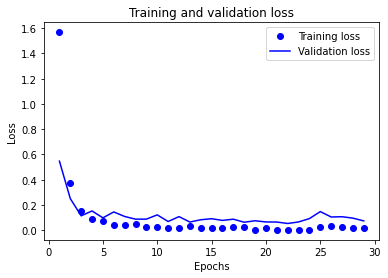

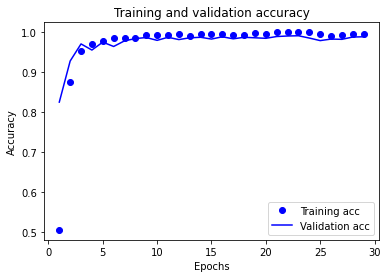

In [ ]:
# plotting
loss = history_made.history['loss']
val_loss = history_made.history['val_loss']
acc = history_made.history['accuracy']
val_acc = history_made.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# loss and accuracy on test 

test_loss, test_acc = model_made.evaluate(X_test, y_test)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

74/74 [==============================] - 1s 7ms/step - loss: 1.0587 - accuracy: 0.8091
Test accuracy : 80.9118%


In [ ]:
pred4 = model_made.predict_generator(X_test)
y_pred4 = np.argmax(pred4, axis=-1) # 모델이 예측한 class label

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Text(0.5, 185.99374999999995, 'Predicted')

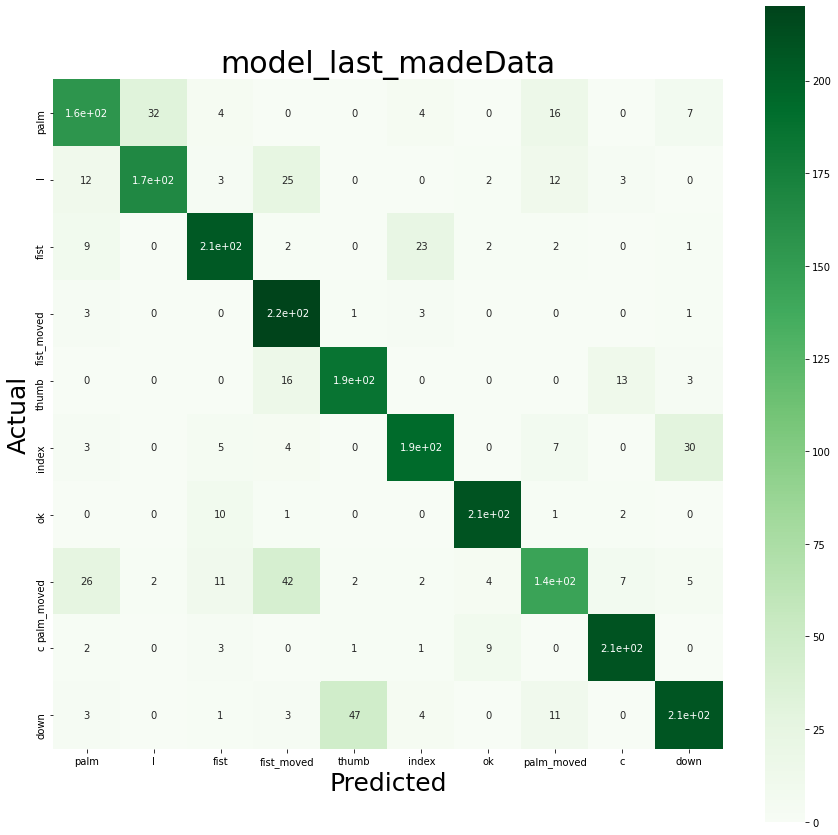

In [ ]:
labels = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']

plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_title("model_last_madeData", fontsize=30)
ax.set_ylabel('Actual', fontsize=25)
ax.set_xlabel('Predicted', fontsize=25)

* model save

In [ ]:
# model save
model_made.save('/content/gdrive/MyDrive/made/model_made.h5')

### **Augmented Data**

### Data upload

* mount drive

In [ ]:
# mount Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import callbacks

In [ ]:
# 저장했던 data load
X_aug = []
y_aug = []
X_aug = np.load('/content/gdrive/MyDrive/made/input_data_made.npy')
y_aug = np.load('/content/gdrive/MyDrive/made/label_data_made.npy')

print(len(X_aug))
print(len(y_aug))
print(X_aug.shape)

7838
7838
(7838, 128, 128, 1)


In [ ]:
# test train split
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_aug,
                                                                  y_aug,
                                                                  test_size = 0.1,
                                                                  random_state=10)

# model
model_aug = Sequential()
model_aug.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,1)))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Conv2D(128, (3,3), activation='relu'))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Conv2D(128, (3,3), activation='relu'))
model_aug.add(MaxPooling2D((2,2)))
model_aug.add(Flatten())
model_aug.add(Dropout(0.3))
model_aug.add(Dense(128, activation='relu'))
model_aug.add(Dense(10, activation='softmax'))

model_aug.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

### Data augmentation

* 사람마다 폴더로 나눠져있으므로, 폴더별로 augmentation data를 생성한 후 MergeDI class를 이용하여 합함

In [ ]:
# DirectoryIterator (train_generator) 합치기
class MergeDI():
    def __init__(self, *gens):
        self.gens = gens

    def generate(self):
        while True:
            for g in self.gens:
                yield next(g)

    def __len__(self):
        return sum([len(g) for g in self.gens])

In [ ]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20, # range 내에서 random하게 data 회전시킴
                             width_shift_range=0.1, # range 내에서 translation
                             height_shift_range=0.1, # range 내에서 translation
                             shear_range=0.1, # range 내에서 affine
                             zoom_range=0.1, # range 내에서 zoom
                             horizontal_flip=False, # 거울모드는 오른손만 detecting해야하므로 false
                             fill_mode='nearest', # 빈 공간을 채울 방법 : 가장 가까운 값
                             validation_split=0.1) # validation split 가능

test_datagen = ImageDataGenerator(rescale=1./255) # test 시에는 변화 x

train_generator_12 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/12',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       batch_size=32,
                                                       subset='training')

train_generator_13 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/13',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       batch_size=32,
                                                       subset='training')

train_generator_14 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/14',
                                                       color_mode='grayscale',
                                                       target_size=(128,128),
                                                       batch_size=32,
                                                       subset='training')

validation_generator_12 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/12',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        batch_size=32,
                                                        subset='validation')

validation_generator_13 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/13',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        batch_size=32,
                                                        subset='validation')

validation_generator_14 = train_datagen.flow_from_directory('/content/gdrive/MyDrive/static_skeleton_data/14',
                                                        color_mode='grayscale',
                                                        target_size=(128,128),
                                                        batch_size=32,
                                                        subset='validation')

train_generator = MergeDI(train_generator_12, train_generator_13, train_generator_14)
validation_generator = MergeDI(validation_generator_12, validation_generator_13, validation_generator_14)

test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/10',
                                                  color_mode='grayscale',
                                                  batch_size=32,
                                                  target_size=(128,128))

print(len(train_generator_12))
print(len(train_generator_13))
print(len(train_generator_14))
print(len(train_generator))
print(len(validation_generator_12))
print(len(validation_generator_13))
print(len(validation_generator_14))
print(len(validation_generator))
print(len(test_generator))

Found 2366 images belonging to 10 classes.
Found 2342 images belonging to 10 classes.
Found 2139 images belonging to 10 classes.
Found 257 images belonging to 10 classes.
Found 257 images belonging to 10 classes.
Found 232 images belonging to 10 classes.
Found 2347 images belonging to 10 classes.
74
74
67
215
9
9
8
26
74


* 첫 번째 input data (image)에 대한 augmentation 결과

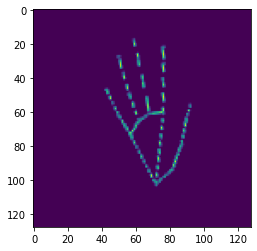

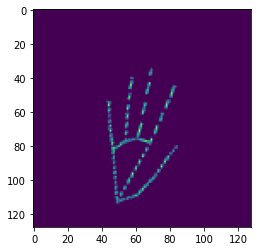

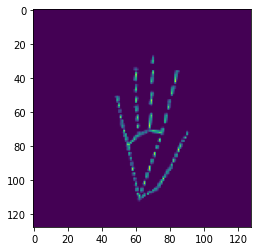

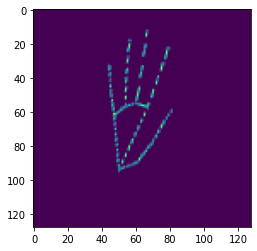

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

x_augmentation = X_aug[0].reshape((1,) + X_aug[0].shape) # 첫 번째 axis 추가 : batch

i=0
for batch in train_datagen.flow(x_augmentation, batch_size=1):
  # 주어진 x에서 batch size만큼 꺼낸 후 전처리 수행하여 return
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0: break # 4번 

### Training

* steps_per_epoch = train data 개수 (6847) / batch size (32) = 약 215
* validation_steps = validation data 개수 (746) / batch size (32) = 약 24

In [ ]:
callbacks_list = [callbacks.EarlyStopping(monitor='accuracy',
                                          patience=5)]

model_aug.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit_generator(train_generator.generate(),
                                      steps_per_epoch=215, epochs=20,
                                      callbacks=callbacks_list,
                                      validation_data=validation_generator.generate(), validation_steps=24)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
215/215 [==============================] - 2334s 11s/step - loss: 1.9401 - accuracy: 0.2925 - val_loss: 1.0278 - val_accuracy: 0.6546
Epoch 2/20
215/215 [==============================] - 75s 349ms/step - loss: 0.6982 - accuracy: 0.7461 - val_loss: 0.5356 - val_accuracy: 0.8275
Epoch 3/20
215/215 [==============================] - 47s 222ms/step - loss: 0.3840 - accuracy: 0.8687 - val_loss: 0.5943 - val_accuracy: 0.8226
Epoch 4/20
215/215 [==============================] - 47s 219ms/step - loss: 0.2868 - accuracy: 0.9090 - val_loss: 0.3416 - val_accuracy: 0.9106
Epoch 5/20
215/215 [==============================] - 47s 218ms/step - loss: 0.2149 - accuracy: 0.9278 - val_loss: 0.3701 - val_accuracy: 0.8783
Epoch 6/20
215/215 [==============================] - 46s 217ms/step - loss: 0.1837 - accuracy: 0.9409 - val_loss: 0.3365 - val_accuracy: 0.8988
Epoch 7/20
215/215 [==============================] - 46s 213ms/step - loss: 0.1302 - accuracy: 0.9589 - val_loss: 0.2227 - val_ac

* result

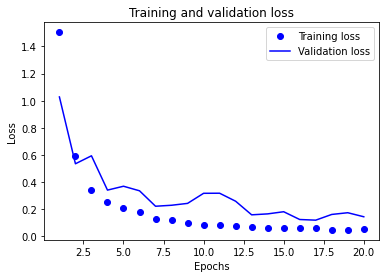

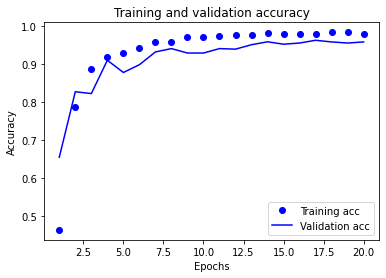

In [ ]:
# plotting
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* model save

In [ ]:
# model save
model_aug.save('/content/gdrive/MyDrive/model_new/model_made_augmentation.h5')

### Testing

* Test data의 경우 위에서 ImageDataGenerator로 생성했음
* steps : test data 개수 (2347) / batch size (32) = 약 75

In [ ]:
# loss and accuracy on test 
test_loss, test_acc = model_aug.evaluate_generator(test_generator)

print('Test accuracy : {:2.4f}%'.format(test_acc*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test accuracy : 88.7942%


##**7. Final Implementation**
**(Make Detection Box and Print label)** 

**Make Detection Box and Print Recognized Label**

In [ ]:
labels = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count =1
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])    


    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

      # Recolor Feed
      image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      results = holistic.process(image)       # Make Detections

      # Recolor image back to BGR for rendering
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
      landmark_img = np.zeros(image.shape, np.uint8) # landmark만 그릴 image
      mp_drawing.draw_landmarks(landmark_img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

      # test data
      landmark_img = cv2.cvtColor(landmark_img, cv2.COLOR_BGR2GRAY)
      landmark_img = cv2.resize(landmark_img, (128,128))

      # Making prediction on test data
      X_test = landmark_img.reshape(1, 128, 128, 1)
      pred = model.predict(X_test)

      if np.max(pred) < 0.2:
        label = 'none'
      else:
        label = labels[np.argmax(pred)] # prediction 결과

      h, w, _ = image.shape # 480,640
      bbox_array = np.zeros([480,640,4], dtype=np.uint8)

      hand_landmarks = results.right_hand_landmarks
      x_point = []  # hand point 저장
      y_point = []  # hand point 저장
      
      if hand_landmarks:
        # for handLMs in hand_landmarks:
        for lm in hand_landmarks.landmark:
          x_point.append(lm.x*640)
          y_point.append(lm.y*480)

        min_x = int(min(x_point))
        max_x = int(max(x_point))
        min_y = int(min(y_point))
        max_y = int(max(y_point))

        bbox_array = cv2.rectangle(bbox_array,(min_x,min_y),(max_x,max_y),(255,0,0),2) # bounding box 그려주기
        bbox_array = cv2.putText(bbox_array,label, (min_x,min_y-10) ,cv2.FONT_ITALIC, 0.5, 255,2) # label 달아주기
        bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
        
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

##**8. Debugging Process**


> 1. Data Augmentation에서 fit_generator 함수의 인자로 여러 개의 train_generator를 list화 하여 주었을 때 에러 발생
  * 직접 만든 데이터의 구조 상 12번 사람, 13번 사람, 14번 사람의 데이터로 폴더가 나누어져 있어 하나의 train_generator로 나타내려면 똑같은 데이터들을 복사하여 하나의 폴더로 합쳐야 했는데, 그렇게 용량을 낭비하는 대신 MergeDI라는 class를 정의하여 여러 개의 generator를 하나로 합칠 수 있었음

> 2. 분명 validation accuracy, test accuracy에서 augmentation을 진행하였을 때가 훨씬 결과가 좋았는데, 시연을 하였을 때에는 예측 성능이 심하게 떨어졌음
  * data augmentation 전까지의 경우 라벨을 y 변수에 할당할 때 경로에서 폴더 명을 split하여 할당하였으므로 palm에 1, l에 2, fist에 3, …과 같은 순서로 indexing을 진행하지만, data augmentation을 진행할 때에는 image data generator를 수행하는 과정에서 palm에 0, l에 1, fist에 2, …와 같은 순서로 indexing을 진행함. 그러므로 시연할 때와 confusion matrix를 구할 때에 indexing 순서를 고려해주어서 문제를 해결하였음